In [1]:
import pandas as pd
import json
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
# sns.set(style='ticks', context='paper', font='CMU Sans Serif')
sns.set(style='ticks', context='paper')
from collections import defaultdict
import numpy as np
from util import plot_cdf

['ns3: 16448,116134.5,204264', 'pmn-m: 36,167.5,378', 'mlsys_s2_bt100: 20,44.0,58']
mlsys: 0,1


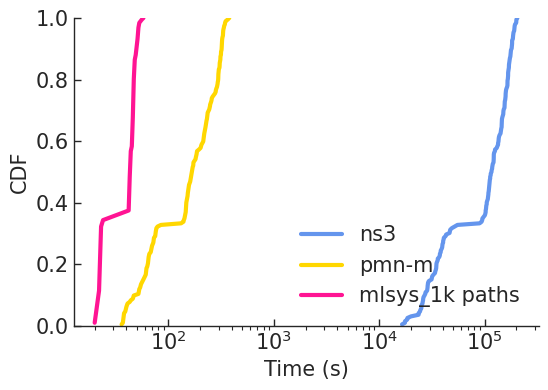

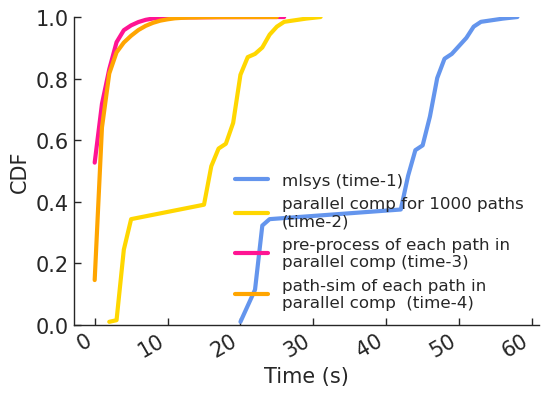

In [4]:
time_elapsed=defaultdict(lambda:[])
time_elapsed_2=defaultdict(lambda:[])
# method_list=['ns3','pmn-m','mlsys_s2_bt50','mlsys_s2_bt50_2k']
method_list=['ns3','pmn-m','mlsys_s2_bt100']
root_dir_mlsys="/data2/lichenni/data_10m"
root_dir_baseline="/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data"
time_preprop=defaultdict(lambda:[])
time_path_sim=defaultdict(lambda:[])
for mix_id in range(192):
    for method in method_list:
        if not method.startswith('mlsys'):
            root_dir=root_dir_baseline
            with open(f'{root_dir}/{mix_id}/{method}/elapsed.txt') as file:
                for line in file:
                    tmp=line.rstrip()
                    time_elapsed[method].append(int(tmp))
        else:
            root_dir=root_dir_mlsys
            if os.path.exists(f'{root_dir}/{mix_id}/{method}/elapsed.txt'):
                with open(f'{root_dir}/{mix_id}/{method}/elapsed.txt') as file:
                    for line in file:
                        tmp=line.rstrip().split(',')
                        time_elapsed[method].append(int(tmp[0])-int(tmp[2]))
                        time_elapsed_2[method].append(int(tmp[1]))
            path_id=0
            while os.path.exists(f'{root_dir}/{mix_id}/{method}/path_{path_id}.txt'):
                with open(f'{root_dir}/{mix_id}/{method}/path_{path_id}.txt') as file:
                    for line_id,line in enumerate(file):
                        if line_id==1:
                            tmp=line.rstrip().split(',')
                            time_preprop[method].append(int(tmp[0]))
                            time_path_sim[method].append(int(tmp[1]))
                path_id+=1
            
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
# legend_list=["{}:{:.0f}s, {:.0f}s, {:.0f}s".format(key,np.min(time_elapsed[key]),np.median(time_elapsed[key]),np.max(time_elapsed[key])) for key in time_elapsed]
legend_list=['ns3','pmn-m','mlsys_1k paths','mlsys_2k (time-1)']
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'test.pdf',legend_list,'Time (s)',legend_font=15,group_size=len(method_list),log_switch=True,loc=4)

print(f"mlsys: {len(time_elapsed['mlsys'])},{len(time_elapsed_2)}")

method_str='mlsys_s2_bt100'
res=[np.array(x) for x in [time_elapsed[method_str],time_elapsed_2[method_str], time_preprop[method_str],time_path_sim[method_str]]]
plot_cdf(res,'time_internal.pdf',['mlsys (time-1)','parallel comp for 1000 paths (time-2)','pre-process of each path in parallel comp (time-3)','path-sim of each path in parallel comp  (time-4)'],'Time (s)',legend_font=12,group_size=4,loc=4,rotate_xaxis=True)

# method_str='mlsys_s2_bt50_2k'
# res=[np.array(x) for x in [time_elapsed[method_str],time_elapsed_2[method_str], time_preprop[method_str],time_path_sim[method_str]]]
# plot_cdf(res,'time_internal.pdf',['mlsys (time-1)','parallel comp for 2000 paths (time-2)','pre-process of each path in parallel comp (time-3)','path-sim of each path in parallel comp  (time-4)'],'Time (s)',legend_font=12,group_size=4,loc=4,rotate_xaxis=True)

[352201, 350725, 351067, 350977, 351532, 352277, 351400, 351406, 351467, 352397, 351222, 350936, 351321, 352721, 351306, 351258, 351806, 351485, 351732, 351851, 350337, 351195, 350933, 351356, 350202, 351155, 350887, 351746, 350358, 351305, 350749, 350823, 351309, 351599, 350968, 352599, 351188, 351388, 352101, 351261, 352443, 351691, 350446, 351734, 350749, 350769, 351922, 351659, 351060, 351590, 350220, 350412, 350162, 350854, 351046, 351010, 118840, 118431, 118496, 118661, 118941, 118766, 118680, 118879, 118471, 118394, 118679, 118537, 118727, 118871, 118486, 118660, 118827, 118636, 118635, 118627, 118475, 118331, 118279, 118728, 118533, 118825, 118719, 118621, 118999, 118466, 118979, 118918, 118664, 119191, 118566, 101875, 102020, 101435, 100721, 101564, 101698, 101922, 101804, 101762, 102174, 101362, 101507, 102565, 101944, 101059, 101284, 101688, 101342, 101271, 100969, 101675, 101515, 102040, 101459, 101478, 101992, 101506, 100857, 101471, 101554, 101268, 101329, 101700, 101526,

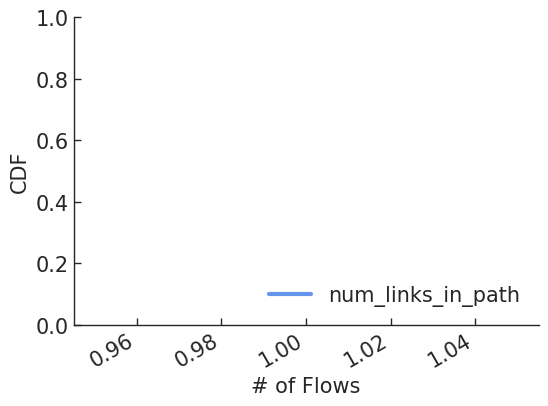

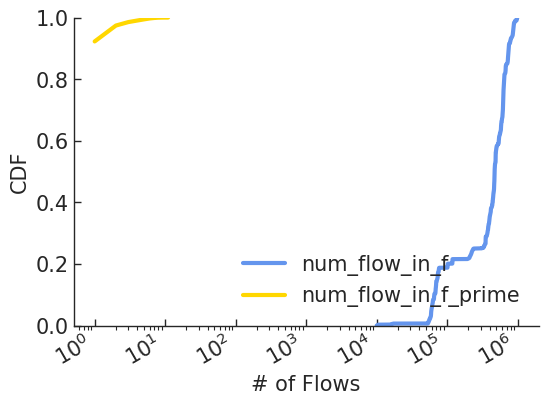

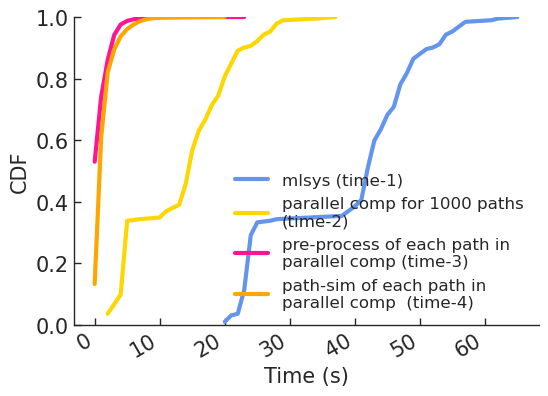

In [4]:
num_flow_in_f=[]
num_flow_in_f_prime=[]
num_link_in_path=[]
method_list=['mlsys']
for mix_id in range(192):
    for method in method_list:
        path_id=0
        while os.path.exists(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/mlsys/path_{path_id}.txt'):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path_{path_id}.txt') as file:
                for line_id,line in enumerate(file):
                    if line_id==0:
                        tmp=line.rstrip().split(',')
                        num_flow_in_f.append(int(tmp[-2]))
                        num_flow_in_f_prime.append(int(tmp[-1]))
                        num_link_in_path.append(len(tmp)-3)
            path_id+=1
res=np.array([num_link_in_path])
plot_cdf(res,'num_link.pdf',['num_links_in_path'],'# of Flows',legend_font=15,group_size=1,loc=4,rotate_xaxis=True)
print(num_flow_in_f)
res=np.array([num_flow_in_f,num_flow_in_f_prime])
plot_cdf(res,'num_flow.pdf',['num_flow_in_f','num_flow_in_f_prime'],'# of Flows',legend_font=15,group_size=2,loc=4,rotate_xaxis=True,log_switch=True)

['mlsys: 167323,323123.0,991516']


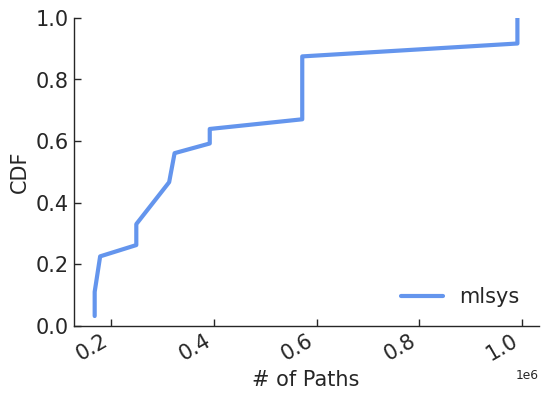

In [8]:
time_elapsed=defaultdict(lambda:[])
method_list=['mlsys']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path.txt') as file:
            number_of_lines = len(file.readlines())
            time_elapsed[method].append(number_of_lines-3)
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'num_path.pdf',method_list,'# of Paths',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

In [27]:
time_elapsed=defaultdict(lambda:[])
num_flows=defaultdict(lambda:[])
method_list=['flowsim-all']
for mix_id in range(191):
    for method in method_list:
        for path_idx in range(20):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/{path_idx}/output.txt') as file:
                line_idx=0
                for line in file:
                    if line_idx==0:
                        tmp=line.rstrip().split(':')[-1]
                        num_flows[method].append(int(tmp))
                    elif line_idx==1:
                        tmp=line.rstrip().split(':')[-1]
                        time_elapsed[method].append(float(tmp))
                    line_idx+=1
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res_time=np.array(list(time_elapsed.values()))
res_flow=np.array(list(num_flows.values()))
plot_cdf(res_flow,'num_flows.pdf',method_list,'# of flows in each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)
plot_cdf(res_time,'time_elapsed.pdf',method_list,'Time (s) for each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

FileNotFoundError: [Errno 2] No such file or directory: '/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/0/flowsim-all/0/output.txt'